In [1]:
# Nạp các gói thư viện cần thiết
import pandas as pd
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc dữ liệu iris từ UCI (https://archive.ics.uci.edu/ml/datasets/Iris) # hoặc từ thư viện scikit-learn
# Tham khảo https://scikit- learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
#print(iris)
columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"]
X = pd.DataFrame(iris.data, columns=columns)
y = iris.target
print(X.describe())
# Sử dụng nghi thức kiểm tra hold-out
# Chia dữ liệu ngẫu nhiên thành 2 tập dữ liệu con:
# training set và test set theo tỷ lệ 70/30
from sklearn.model_selection import train_test_split

       Petal Length  Petal Width  Sepal Length  Sepal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: 0.911


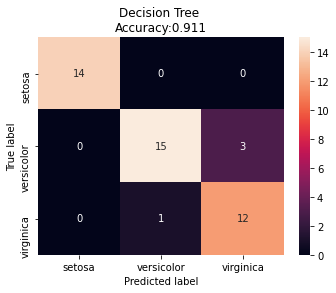

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)
# Xây dựng mô hình phân loại dữ liệu 
model = GaussianNB() 
model.fit(X_train, y_train)
# Dự đoán nhãn tập kiểm tra 
y_pred = model.predict(X_test) 
# print(y_pred)
# Tính độ chính xác
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" % accuracy_score(y_test, y_pred))
# Xây dựng confusion-matrix. Tham khảo:
# https://www.python-course.eu/confusion_matrix.php 
cm = confusion_matrix(y_test, y_pred)
# Chuyển confusion-matrix về data frame phục vụ cho việc vẽ đồ thị 
cm_df = pd.DataFrame(cm,
                    index=['setosa', 'versicolor', 'virginica'],
                    columns=['setosa', 'versicolor', 'virginica'])
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [3]:
def load_datasets(name):
    if name == 'Iris':
        data = datasets.load_iris()
    elif name == 'Breast Cancer':
        data = datasets.load_breast_cancer()
    elif name == 'Wine':
        data = datasets.load_wine()
    elif name == 'Handwritten Digits':
        data = datasets.load_digits()
    df = pd.DataFrame(data.data)
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)
    return X_train, X_test, y_train, y_test, data.target_names

In [4]:
def evaluate(dataset_name, model, X_test, y_test, labels):
    # Dự đoán nhãn tập kiểm tra
    y_pred = model.predict(X_test) 
    # Tính độ chính xác
    print("%s Hold-out = %.3f" % (dataset_name, accuracy_score(y_test, y_pred)))
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                        index=labels,
                        columns=labels)
    plt.figure(figsize=(5.5, 4))
    sns.heatmap(cm_df, annot=True, cmap="Blues")
    plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Iris Hold-out = 0.956


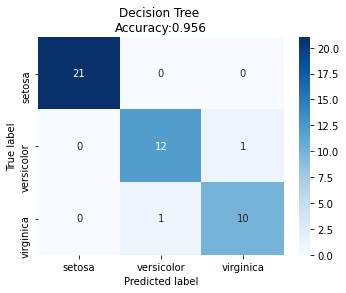

In [5]:
dataset_name = 'Iris'
X_train, X_test, y_train, y_test, labels = load_datasets(dataset_name)
model = GaussianNB() 
model.fit(X_train, y_train)
evaluate(dataset_name, model, X_test, y_test, labels)

Breast Cancer Hold-out = 0.906


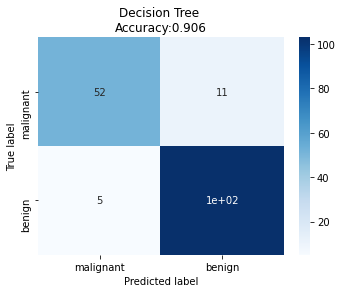

In [6]:
dataset_name = 'Breast Cancer'
X_train, X_test, y_train, y_test, labels = load_datasets(dataset_name)
model = GaussianNB() 
model.fit(X_train, y_train)
evaluate(dataset_name, model, X_test, y_test, labels)

Wine Hold-out = 0.981


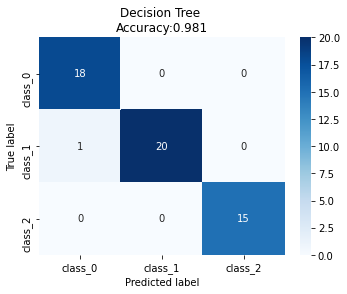

In [7]:
dataset_name = 'Wine'
X_train, X_test, y_train, y_test, labels = load_datasets(dataset_name)
model = GaussianNB() 
model.fit(X_train, y_train)
evaluate(dataset_name, model, X_test, y_test, labels)

Handwritten Digits Hold-out = 0.824


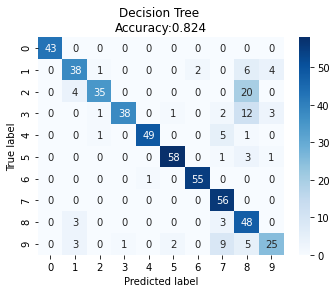

In [8]:
dataset_name = 'Handwritten Digits'
X_train, X_test, y_train, y_test, labels = load_datasets(dataset_name)
model = GaussianNB() 
model.fit(X_train, y_train)
evaluate(dataset_name, model, X_test, y_test, labels)